## BnB DFS ##

In [117]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt

# pg 182

def DFS(dist_mat, start):
    
    def NN(state):

        dist_mat_tilde = dist_mat.copy().to_numpy()
        dist_mat_tilde[state[:-1]] = 10**9
        dist_mat_tilde[:,state[:-1]] = 10**9
        np.fill_diagonal(dist_mat_tilde, 10**9)
        
        cost = 0
        next = state[-1]
        iter = 0

        while iter <= len(dist_mat) - len(state) - 1:

            ind = dist_mat_tilde[next,:].argmin() # city with min dist from current
            cost_new = dist_mat_tilde[next,ind]
            dist_mat_tilde[:,next] = 10**9
            cost += cost_new
            next = ind
            iter += 1
        return cost + dist_mat.loc[next,state[0]]
        
    def objective_function(state):
        
        # nearest neighbors heuristic
        h = NN(state)
        
        if len(state) <= 2:
            return U
        
        cost = h

        for i in range(len(state) - 2):
            cost += dist_mat.loc[state[i], state[i+1]]
        cost += dist_mat.loc[state[-2],state[-1]]

        # add zero onto the end
        if len(state) == len(dist_mat):
            cost += dist_mat.loc[state[-1], 0]
        return cost
    
    # appends newly generated nodes to frontier
    def gen_front(current, frontier, N):

        nums = [i for i in range(N)]
        
        for y in current:
            if y in nums:
                nums.remove(y)
        for i in range(len(nums)):
            t = current[:]
            t.append(nums[i])
            frontier.append(t)
        return frontier
    
    cost_array = []
    best_path = []
    best_dist = 0
    
    frontier = [start]    
    N = len(dist_mat)
    U = 10**9 # initial bound 
    
    while frontier != []:
        new_path = frontier.pop()
        path_cost = objective_function(new_path)
        
        if path_cost > U:
            continue
            
        # we have a complete path    
        elif len(new_path) == N:
            U = path_cost
            best_path = new_path
            best_dist = path_cost
            cost_array.append(path_cost)
            
        else:
            frontier = gen_front(new_path, frontier, N)
            
    plt.plot(cost_array)
    plt.title('Progression path cost')
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    
    return best_path, best_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,81.0,51.0,135.0,83.0,75.0,81.0,90.0,52.0,380.0,143.0,215.0,236.0,71.0,125.0,168.0,80.0,48.0,107.0,39.0
1,81.0,0.0,23.0,31.0,118.0,34.0,20.0,4.0,46.0,29.0,291.0,170.0,87.0,88.0,92.0,209.0,252.0,28.0,172.0,26.0
2,51.0,23.0,0.0,210.0,65.0,10.0,263.0,73.0,40.0,182.0,86.0,274.0,63.0,113.0,45.0,119.0,29.0,189.0,180.0,58.0
3,135.0,31.0,210.0,0.0,155.0,33.0,135.0,98.0,41.0,193.0,168.0,69.0,96.0,109.0,59.0,28.0,107.0,192.0,38.0,168.0
4,83.0,118.0,65.0,155.0,0.0,80.0,256.0,288.0,167.0,208.0,132.0,213.0,275.0,66.0,120.0,103.0,53.0,38.0,83.0,151.0
5,75.0,34.0,10.0,33.0,80.0,0.0,182.0,126.0,86.0,249.0,121.0,46.0,371.0,78.0,157.0,23.0,74.0,52.0,147.0,85.0
6,81.0,20.0,263.0,135.0,256.0,182.0,0.0,229.0,96.0,185.0,176.0,78.0,45.0,185.0,149.0,179.0,158.0,57.0,118.0,332.0
7,90.0,4.0,73.0,98.0,288.0,126.0,229.0,0.0,222.0,97.0,205.0,85.0,109.0,75.0,90.0,199.0,108.0,286.0,184.0,158.0
8,52.0,46.0,40.0,41.0,167.0,86.0,96.0,222.0,0.0,179.0,185.0,155.0,85.0,190.0,117.0,224.0,162.0,65.0,151.0,58.0
9,380.0,29.0,182.0,193.0,208.0,249.0,185.0,97.0,179.0,0.0,4.0,100.0,140.0,92.0,117.0,32.0,89.0,98.0,117.0,118.0


([0, 19, 11, 14, 10, 9, 15, 5, 2, 7, 1, 6, 12, 16, 4, 17, 13, 18, 3, 8], 795.0)

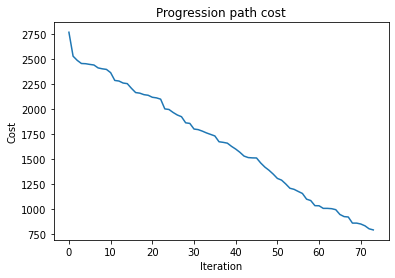

In [119]:
import numpy as np
import pandas as pd

def write_distance_matrix(n, mean, sigma):
    distance_matrix = np.zeros((n, n))
    random_distance = []
    num_distance = int(n * (n-1) / 2)
    for _ in range(num_distance):
        distance = 0
        while distance <= 0:
            distance = np.random.normal(mean, sigma)

        random_distance.append(round(distance))
    
    iu = np.triu_indices(n, 1)
    distance_matrix[iu] = random_distance
    distance_matrix += distance_matrix.T

    return distance_matrix
    

mean = 100
sigma = 100
N = 20
start = [0]
distance_matrix = pd.DataFrame(write_distance_matrix(N, mean, sigma))

DFS(distance_matrix, start)